# Laporan Praktikum 2 Kelompok 5 Teori Graf (D)

| Name           | NRP        |
| ---            | ---        |
| Melvan Hapianan Allo Pongalabba | 5025241124  |
| Alfianz Risqia Ilahi Loven Kary | 5025241164  |
| Isabella Sienna Sulisthio | 5025241199 |

---

## Soal:
Implementasikan sebuah program untuk menyelesaikan permasalahan “*Largest Monotonically Increasing Subsequence*” (pada hal 3)

Contoh: 4, 1, 13, 7, 0, 2, 8, 11, 3

Problem ini bertujuan untuk mencari urutan bilangan yang menaik dengan panjang terbesar dari urutan bilangan di atas tanpa mengubah urutan aslinya (hanya boleh melompati/membuang angka tersebut).

---

## Penyelesaian:

Penyelesaian permasalahan tersebut dibuat dengan menggunakan DP dan algoritma backtracking untuk menghitung struktur LIS (panjang + predecessor) serta menelusuri jalur lengkap yang termasuk ke dalam *Largest Monotonically Increasing Subsequence*.
Pertama-tama untuk menyelesaikan permasalahan tersebut, kita perlu mengimport beberapa library yaitu `matplotlib.pyplot` dan `networkx`.

* `matplotlib.pyplot`: digunakan untuk menggambar graf yang menjadi LIS.
* `networkx`: digunakan untuk membuat graf berarah dan memvisualisasikan keterkaitan elemen yang menjadi LIS.

Dalam kode tersebut didefinisikan sebuah fungsi `find_all_lis_and_draw(nums)` yang akan menjadi fungsi utama dalam solusi penyelesaian masalah Largest Monotonically Increasing Subsequence ini.

Fungsi ini akan berfungsi untuk:
*   Mencari semua LIS
*   Membuat graf berarah yang menampilkan hubungan elemen LIS
*   Menampilkan visualisasi node dan edge (Graf)
*   Menampilkan hasil LIS di terminal







Pertama-tama, fungsi `find_all_lis_and_draw` akan menjalankan validasi input dan menginisialisasi struktur DP dengan:
```python
n = len(nums)
if n == 0:
    print("Urutan kosong.")
    return

dp = [1] * n
preds = [[] for _ in range(n)]
```

Struktur DP tersebut nantinya akan menyimpan panjang LIS yang akan berakhir pada index i, sedangkan preds[i] digunakan untuk menyimpan semua indeks j yang memiliki nilai nums[j] < nums[i] dan LIS yang berakhir di indeks j dapat diperpanjang menjadi LIS terpanjang yang berakhir di indeks i.

Selanjutnya, kita dapat mengisikan elemen DP dan preds dengan melakukan _double for-loop_  dengan membandingkan setiap elemen (nums[j], nums[i]) dimana j < i.

Jika nums[i] > nums[j] maka nums[i] dapat memperpanjang LIS yang berakhir di j. Akan dilakukan pembaruan dp dan preds, dimana:
* Jika dp[j] + 1 > dp[i]: LIS baru melalui j lebih panjang dari yang ditemukan sebelumnya di i. dp[i] diperbarui, dan preds[i] di-reset hanya berisi j.
* Jika dp[j] + 1 == dp[i]: LIS baru melalui j memiliki panjang yang sama dengan yang sudah ditemukan. j ditambahkan ke preds[i] sebagai pendahulu alternatif.

```python
    for i in range(n):
        for j in range(i):
            if nums[i] > nums[j]:
                if dp[j] + 1 > dp[i]:
                    dp[i] = dp[j] + 1
                    preds[i] = [j]
                elif dp[j] + 1 == dp[i]:
                    preds[i].append(j)

    max_len = max(dp)

    end_indices = [i for i, x in enumerate(dp) if x == max_len]
```

`max_len = max(dp)`: bertujuan untuk menemukan panjang maksimum dari semua LIS yang mungkin <br>
`end_indices`: bertujuan untuk menemukan titik akhir dari semua LIS terpanjang.


Setelah semua node predecessor (pendahulu) sudah dilacak, dijalankan fungsi `backtrack` yang dilakukan secara rekursif untuk membangun semua jalur LIS dari titik akhir ke titik awal (backtracking).

Setelah mendapatkan semua jalur LIS yang berakhir di `prev_idx`, hal selanjutnya yang dilakukan dalam fungsi `backtrack` adalah menggabungkan hasil rekursi yang didapatkan yang akan membangun jalur LIS dari bawah ke atas.

Lalu dengan melakukan for-loop kita akan mengambil semua LIS dari semua endpoint, dan menyusun serta menyimpannya dalam bentuk nilai node tanpa adanya duplikasi.

Adapun kode fungsi `backtrack(current_idx)` adalah sebagai berikut.

```python
def backtrack(current_idx):
    if not preds[current_idx]:
        return [[(current_idx, nums[current_idx])]]

    paths = []
    for prev_idx in preds[current_idx]:
        sub_paths = backtrack(prev_idx)
        for path in sub_paths:
            paths.append(path + [(current_idx, nums[current_idx])])
    return paths

    for end_idx in end_indices:
        paths = backtrack(end_idx)
        for p in paths:
            values_only = [val for idx, val in p]
            if values_only not in all_lis:
                all_lis.append(values_only)
```

Setelah melakukan penelusuran jalur yang termasuk ke dalam LIS, kita akan membuat visualisasi berupa _directed graph_ yang menunjukkan hubungan antar node.

Pembuatan graf akan menggunakan fungsi `nx.DiGraph()` dimana semua node yang telah didapatkan dalam pencarian menggunakan backtrack tadi akan dimasukkan ke dalam graf tersebut.

Selanjutnya akan dilakukan penambahan node ke dalam graf dengan menggunakan _for-loop_ yang akan menambahkan setiap indeks array sebagai node pada graf yang akan digambar.
```python
    for i in range(n):
        G.add_node(i, label=f"{nums[i]}\n({i})", subset=i)
```


Untuk dapat menentukan edge mana yang akan termasuk ke dalam jalur LIS, kita akan menggunakan fungsi `collect_edges` untuk mengumpulkan semua edge yang merupakan bagian jalur LIS sehingga edge yang menjadi jalur LIS tersebut dapat diberi warna khusus dalam penggambarannya.

```python
    lis_edges = set()


    def collect_edges(current_idx):
        if dp[current_idx] == 1:
            return
        for prev_idx in preds[current_idx]:
            lis_edges.add((prev_idx, current_idx))
            collect_edges(prev_idx)

    for end_idx in end_indices:
        collect_edges(end_idx)
```

Setelah mengumpulkan edge yang termasuk ke dalam jalur LIS, kita akan menambahkan edge tersebut ke dalam graf yang akan digambarkan. Penambahan edge tersebut akan dilakukan jika edge valid dalam hubungan LIS dimana (nums[j], nums[i])

Jika edge tersebut dipakai dalam jalur LIS maka akan diberi warna merah, sedangkan jika tidak digunakan maka akan diberi warna abu-abu.

```python
edge_colors = []
  for i in range(n):
    for j in range(i):
        if nums[i] > nums[j]:
            if j in preds[i]:
                G.add_edge(j, i)
                if (j, i) in lis_edges:
                    edge_colors.append('red')
                else:
                    edge_colors.append('lightgray')
```

Kemudian posisi graf akan diurutkan secara horizontal berdasarkan urutan input (indeks) serta dilakukan pewarnaan node. Dimana node akan diwarnai hijau apabila termasuk ke dalam jalur LIS, dan node akan diwarnai abu-abu jika tidak termasuk ke dalam jalur LIS.

```python
pos = nx.multipartite_layout(G, subset_key="subset", align='horizontal')

node_colors = []
flattened_lis_indices = set()

for end_idx in end_indices:
    queue = [end_idx]
    while queue:
        curr = queue.pop(0)
        flattened_lis_indices.add(curr)
        queue.extend(preds[curr])

for i in range(n):
    if i in flattened_lis_indices:
        node_colors.append('#00FF00')
    else:
        node_colors.append('#e0e0e0')

```

Lalu, dilakukan penggambaran keseluruhan graf dengan menggunakan konfigurasi edge, dan node yang telah disetting sebelumnya.

Penggambaran graf dilakukan dengan menggunakan fungsi `nx.draw()` agar didapatkan sebuah grafik graf dengan warna, ukuran, dan panah.

```python
labels = nx.get_node_attributes(G, 'label')
nx.draw(G, pos, labels=labels, with_labels=True,
        node_color=node_colors, edge_color=edge_colors,
        node_size=2500, font_size=9, font_weight='bold',
        arrowsize=20, width=2)

```



Visualisasi graf dilengkapi dengan judul dan tampilan graf yang telah dibuat melalui konfigurasi sebagai berikut.

```python
plt.title(f"Visualisasi Semua Kemungkinan LIS\nPanjang: {max_len} | Jumlah Solusi: {len(all_lis)}")
plt.axis('off')
plt.tight_layout()
plt.show()
```

Untuk menampilkan output program berupa panjang jalur LIS, jumlah jalur LIS yang ditemukan, dan list jalur yang ditemukan serta mendapatkan input untuk dicari jalur LIS nya dapat menggunakan potongan kode di bawah dimana setelah mendapatkan input, akan dijalankan fungsi utama yang akan mengeksekusi pencarian jalur LIS serta penggambaran grafik berupa directed graf.
```python
    print("\n" + "="*40)
    print("       HASIL PENCARIAN LIS")
    print("="*40)
    print(f"Urutan Input : {nums}")
    print(f"Panjang LIS  : {max_len}")
    print(f"Jumlah LIS   : {len(all_lis)} buah")
    print("-" * 40)
    print("Daftar Solusi LIS:")
    for i, seq in enumerate(all_lis, 1):
        print(f"{i}. {seq}")
    print("="*40)

if __name__ == "__main__":
    print("Masukkan urutan bilangan dipisahkan dengan spasi atau koma.")
    print("Contoh: 4 1 13 7 0 2 8 11 3")

    user_input = input("Input Anda: ")

    try:
        clean_input = user_input.replace(',', ' ')
        sequence = [int(x) for x in clean_input.split()]

        find_all_lis_and_draw(sequence)

    except ValueError:
        print("Error: Pastikan input hanya berupa angka!")
```

Masukkan urutan bilangan dipisahkan dengan spasi atau koma.
Contoh: 4 1 13 7 0 2 8 11 3
Input Anda: 4, 1, 13, 7, 0, 2, 8, 11, 3


/tmp/ipython-input-1249157811.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


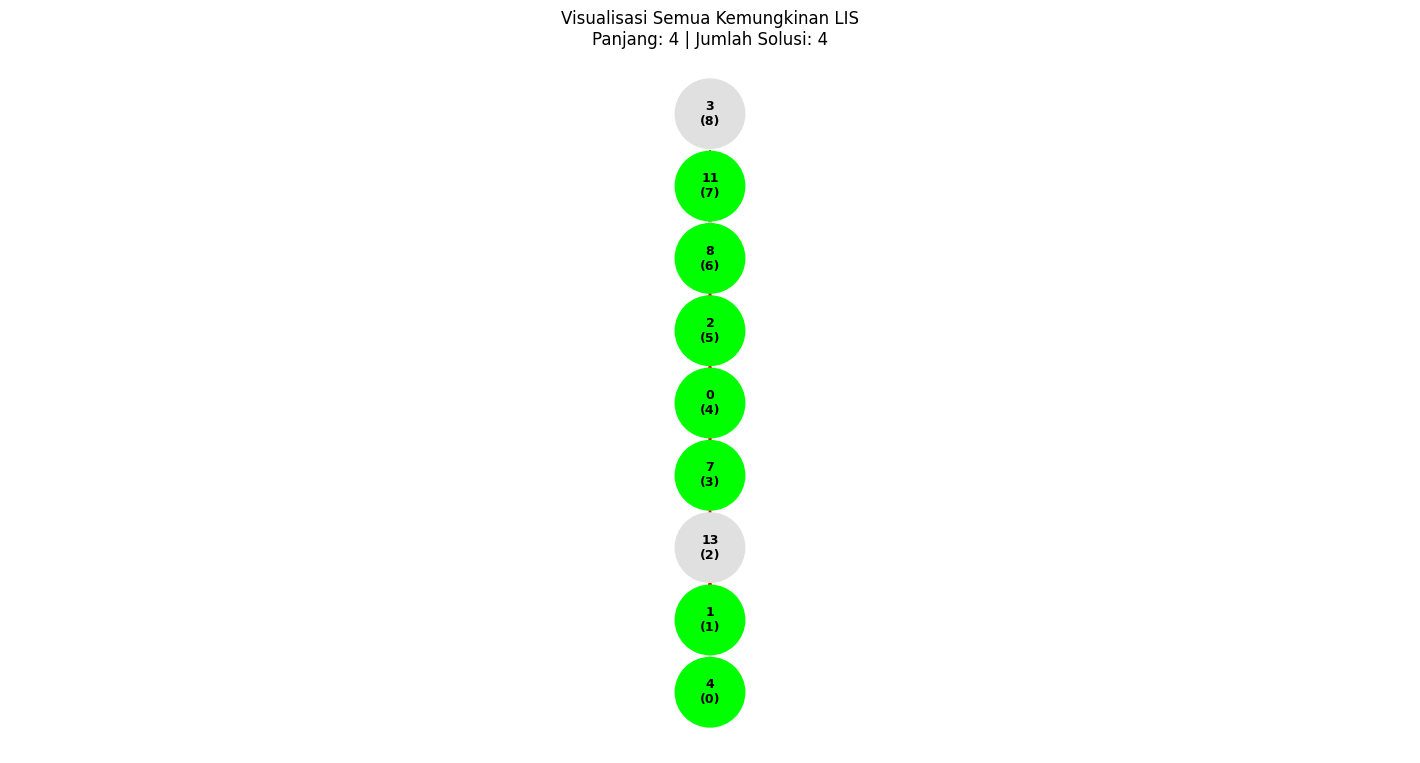


       HASIL PENCARIAN LIS
Urutan Input : [4, 1, 13, 7, 0, 2, 8, 11, 3]
Panjang LIS  : 4
Jumlah LIS   : 4 buah
----------------------------------------
Daftar Solusi LIS:
1. [4, 7, 8, 11]
2. [1, 7, 8, 11]
3. [1, 2, 8, 11]
4. [0, 2, 8, 11]


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def find_all_lis_and_draw(nums):
    n = len(nums)
    if n == 0:
        print("Urutan kosong.")
        return

    dp = [1] * n
    preds = [[] for _ in range(n)]

    for i in range(n):
        for j in range(i):
            if nums[i] > nums[j]:
                if dp[j] + 1 > dp[i]:
                    dp[i] = dp[j] + 1
                    preds[i] = [j]
                elif dp[j] + 1 == dp[i]:
                    preds[i].append(j)

    max_len = max(dp)

    end_indices = [i for i, x in enumerate(dp) if x == max_len]

    all_lis = []

    def backtrack(current_idx):
        if not preds[current_idx]:
            return [[(current_idx, nums[current_idx])]]

        paths = []
        for prev_idx in preds[current_idx]:
            sub_paths = backtrack(prev_idx)
            for path in sub_paths:
                paths.append(path + [(current_idx, nums[current_idx])])
        return paths

    for end_idx in end_indices:
        paths = backtrack(end_idx)
        for p in paths:
            values_only = [val for idx, val in p]
            if values_only not in all_lis:
                all_lis.append(values_only)

    G = nx.DiGraph()

    for i in range(n):
        G.add_node(i, label=f"{nums[i]}\n({i})", subset=i)

    lis_edges = set()


    def collect_edges(current_idx):
        if dp[current_idx] == 1:
            return
        for prev_idx in preds[current_idx]:
            lis_edges.add((prev_idx, current_idx))
            collect_edges(prev_idx)

    for end_idx in end_indices:
        collect_edges(end_idx)


    edge_colors = []


    for i in range(n):
        for j in range(i):
            if nums[i] > nums[j]:
                if j in preds[i]:
                    G.add_edge(j, i)
                    if (j, i) in lis_edges:
                         edge_colors.append('red')
                    else:
                         edge_colors.append('lightgray')


    plt.figure(figsize=(14, 7))
    pos = nx.multipartite_layout(G, subset_key="subset", align='horizontal')


    node_colors = []
    flattened_lis_indices = set()
    for end_idx in end_indices:
        queue = [end_idx]
        while queue:
            curr = queue.pop(0)
            flattened_lis_indices.add(curr)
            queue.extend(preds[curr])

    for i in range(n):
        if i in flattened_lis_indices:
            node_colors.append('#00FF00')
        else:
            node_colors.append('#e0e0e0')

    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, labels=labels, with_labels=True,
            node_color=node_colors, edge_color=edge_colors,
            node_size=2500, font_size=9, font_weight='bold',
            arrowsize=20, width=2)

    plt.title(f"Visualisasi Semua Kemungkinan LIS\nPanjang: {max_len} | Jumlah Solusi: {len(all_lis)}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    print("\n" + "="*40)
    print("       HASIL PENCARIAN LIS")
    print("="*40)
    print(f"Urutan Input : {nums}")
    print(f"Panjang LIS  : {max_len}")
    print(f"Jumlah LIS   : {len(all_lis)} buah")
    print("-" * 40)
    print("Daftar Solusi LIS:")
    for i, seq in enumerate(all_lis, 1):
        print(f"{i}. {seq}")
    print("="*40)

if __name__ == "__main__":
    print("Masukkan urutan bilangan dipisahkan dengan spasi atau koma.")
    print("Contoh: 4 1 13 7 0 2 8 11 3")

    user_input = input("Input Anda: ")

    try:
        clean_input = user_input.replace(',', ' ')
        sequence = [int(x) for x in clean_input.split()]

        find_all_lis_and_draw(sequence)

    except ValueError:
        print("Error: Pastikan input hanya berupa angka!")